In [153]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# MAE Model Visualization

In [154]:
import viz

## Load pre-trained MAE model

In [ ]:
common_architecture = "mae_vit_tiny"

model_mse = viz.prepare_model(
    chkpt_dir=f"out_{common_architecture}_xformers_scaled_dot_product_MLP_i64_p8_b512_e200_mse",
    arch=common_architecture
)

model_l1 = viz.prepare_model(
    chkpt_dir=f"out_{common_architecture}_xformers_scaled_dot_product_MLP_i64_p8_b512_e200_l1",
    chkpt_name="100",
    arch=common_architecture
)

models = {"SDP - MSE": model_mse, "SDP - L1": model_l1}

## Run on selected images from './images' folder

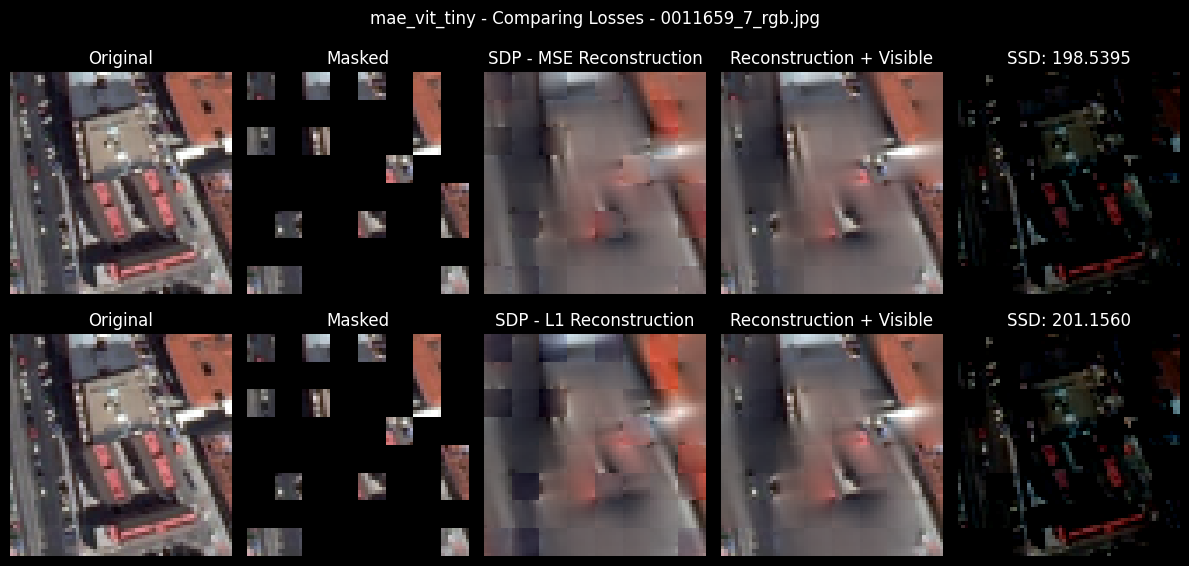

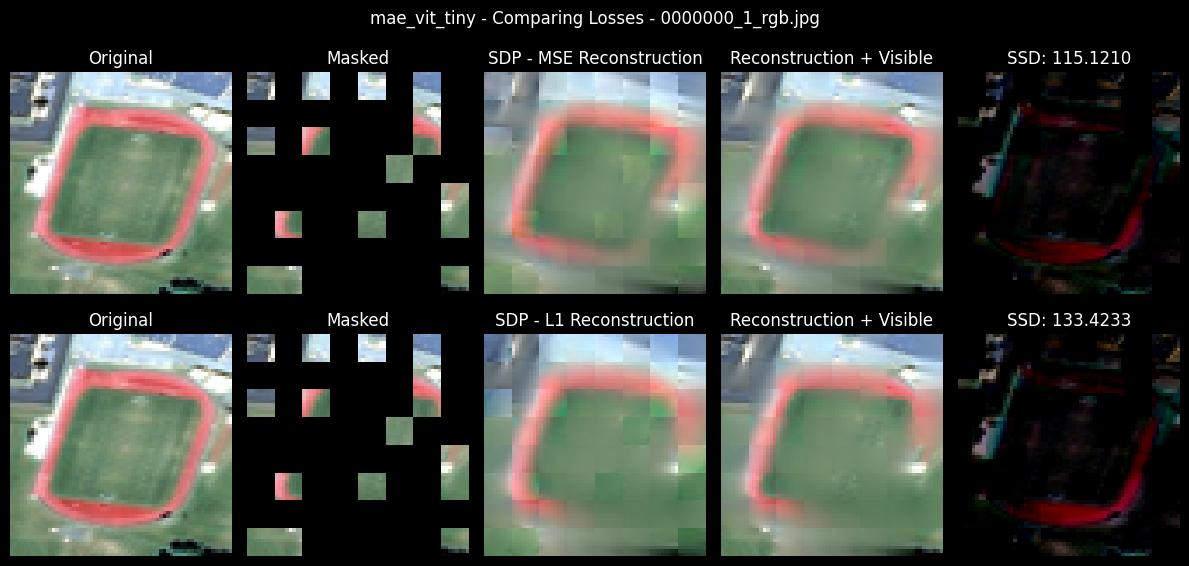

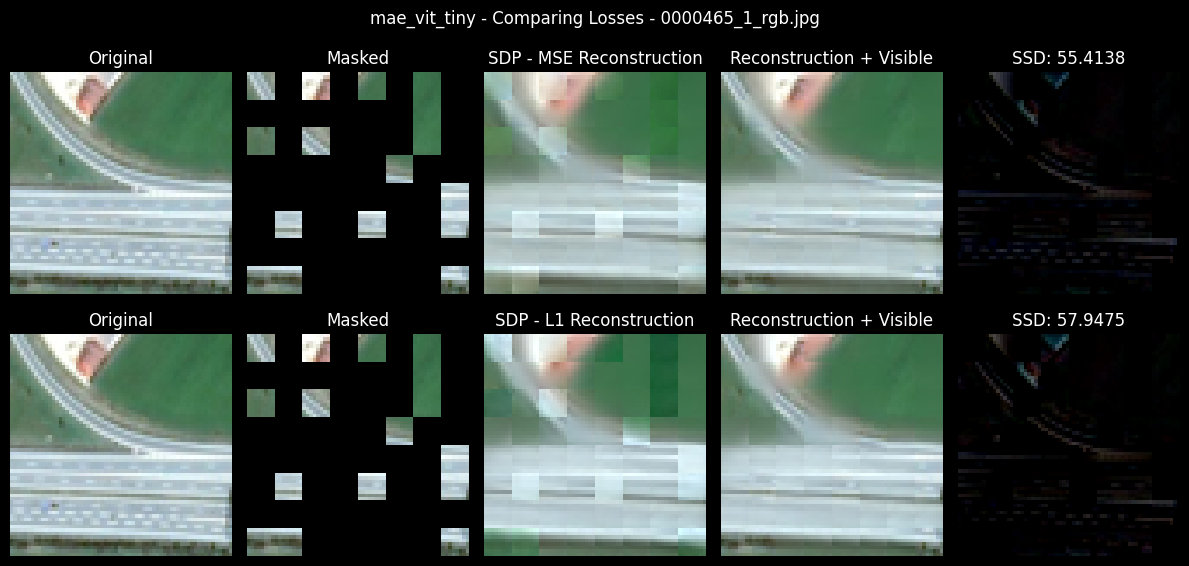

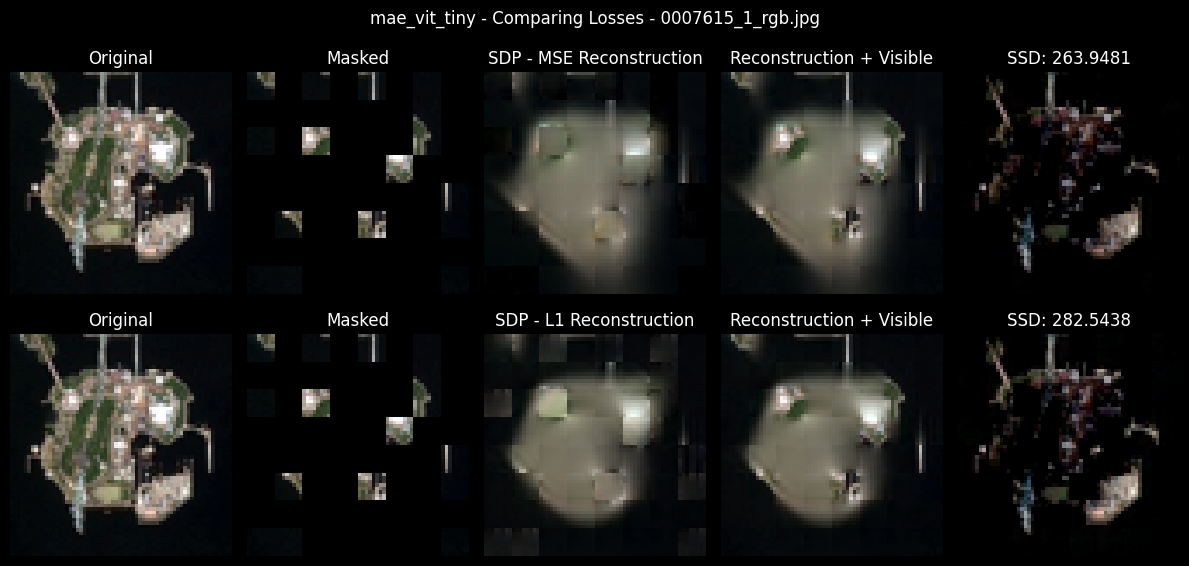

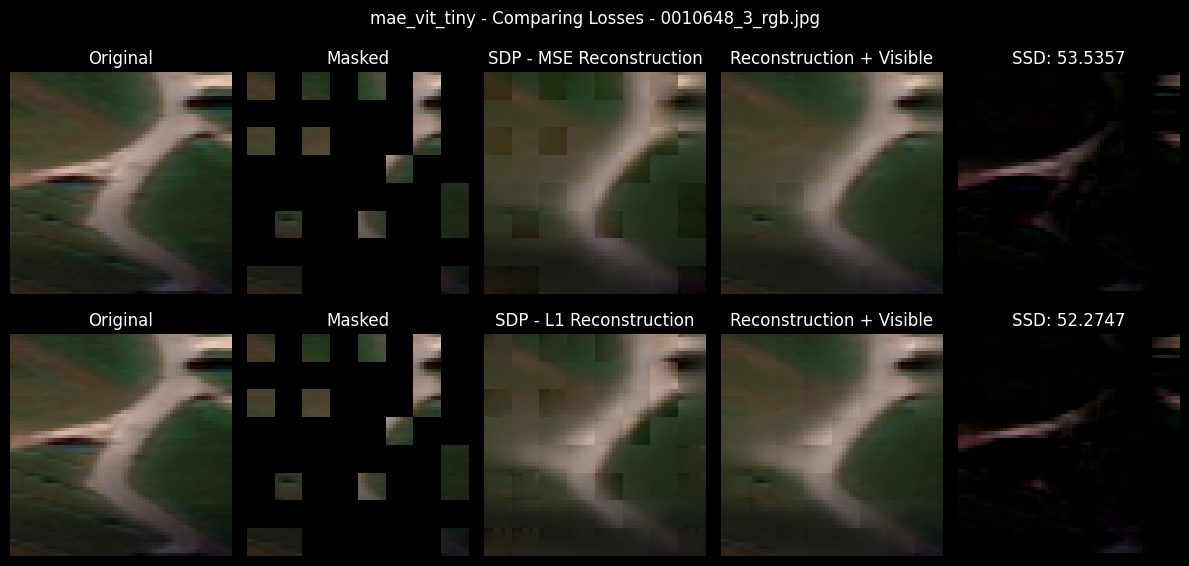

In [ ]:
viz.plot_comp_many(
    models,
    "./images",
    maskseed=1234,
    base_title=f"{common_architecture} - Comparing Losses",
    save=True,
)

## Run on random images from the test set

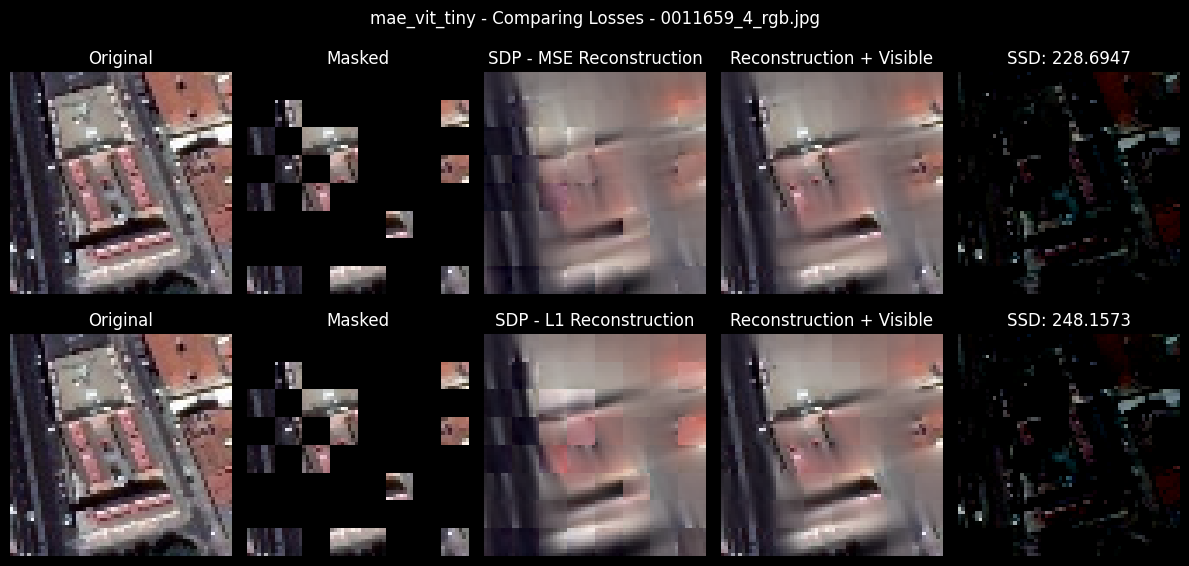

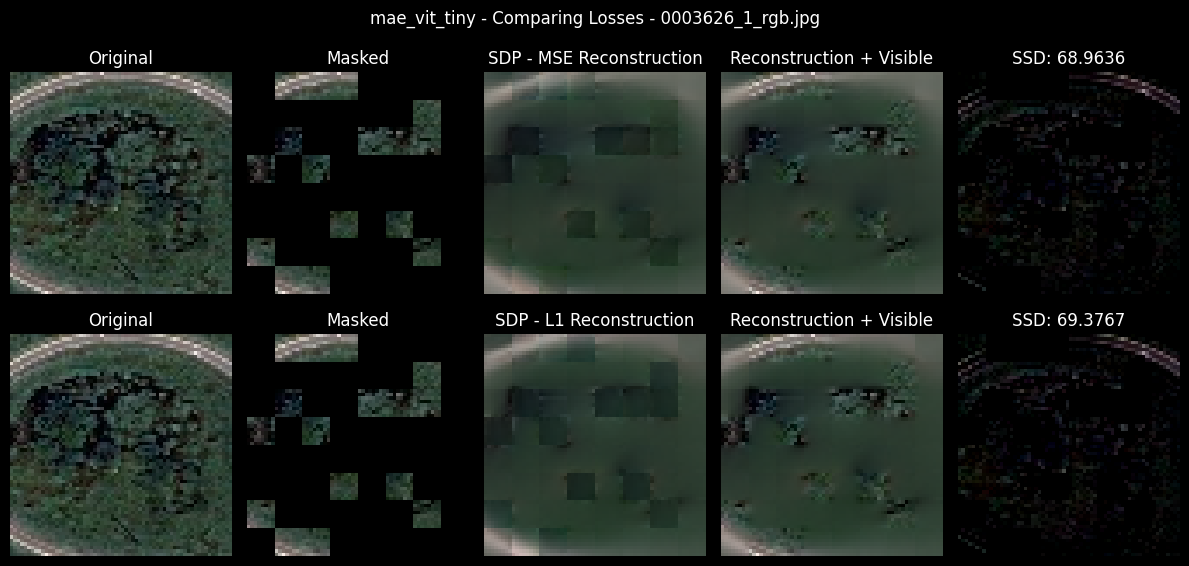

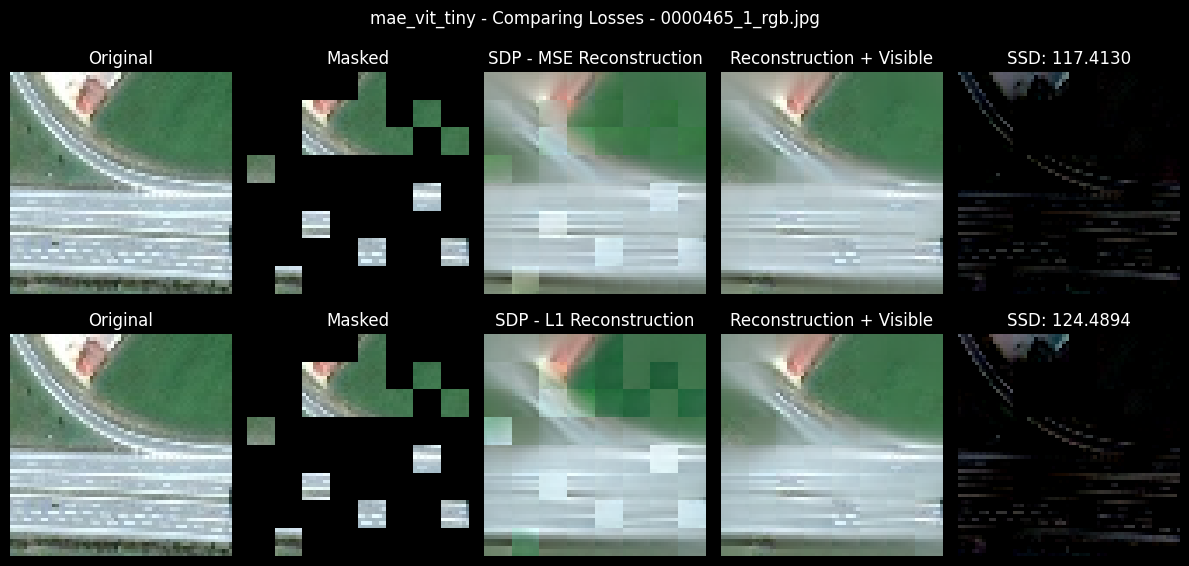

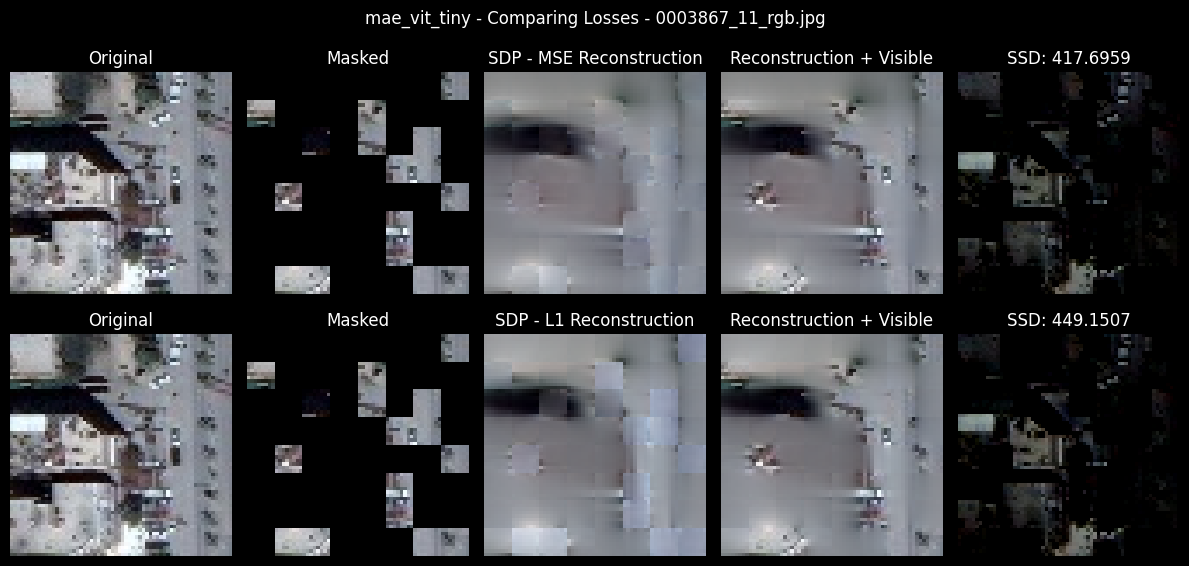

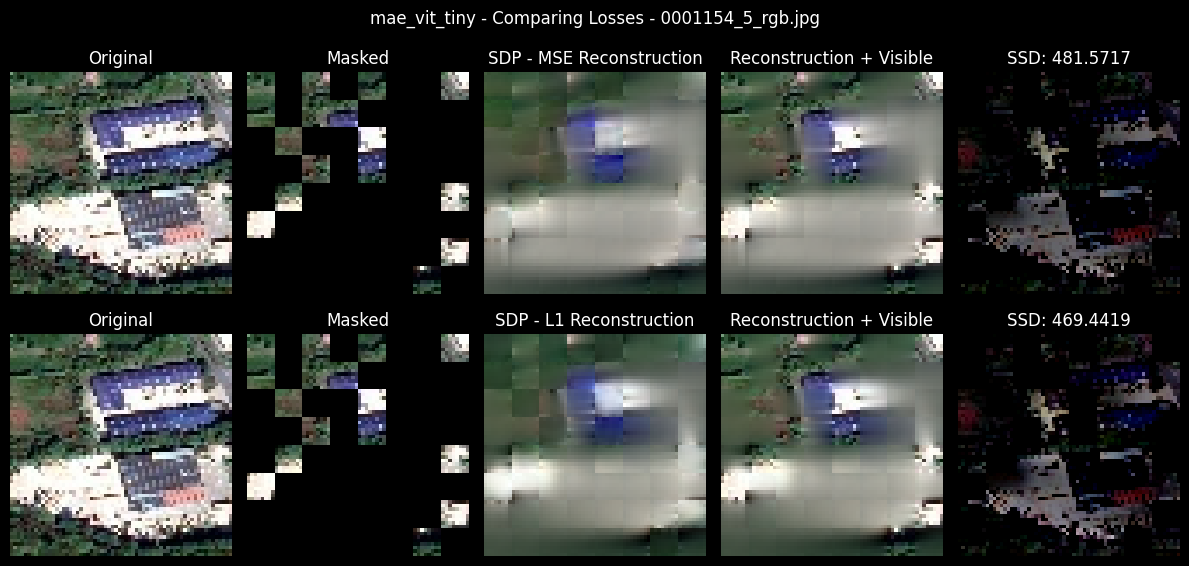

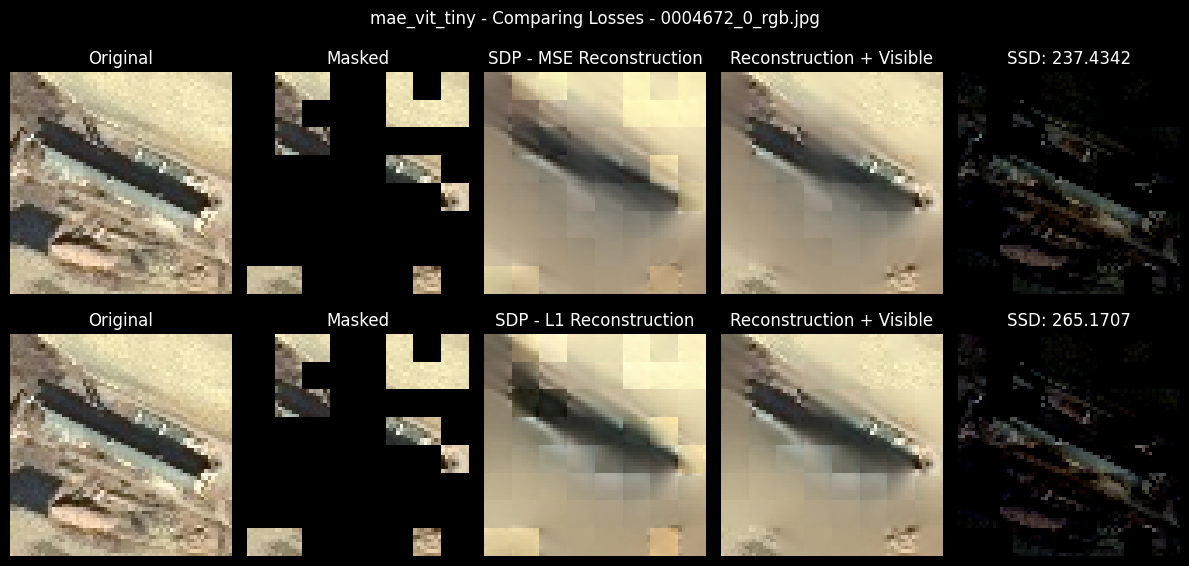

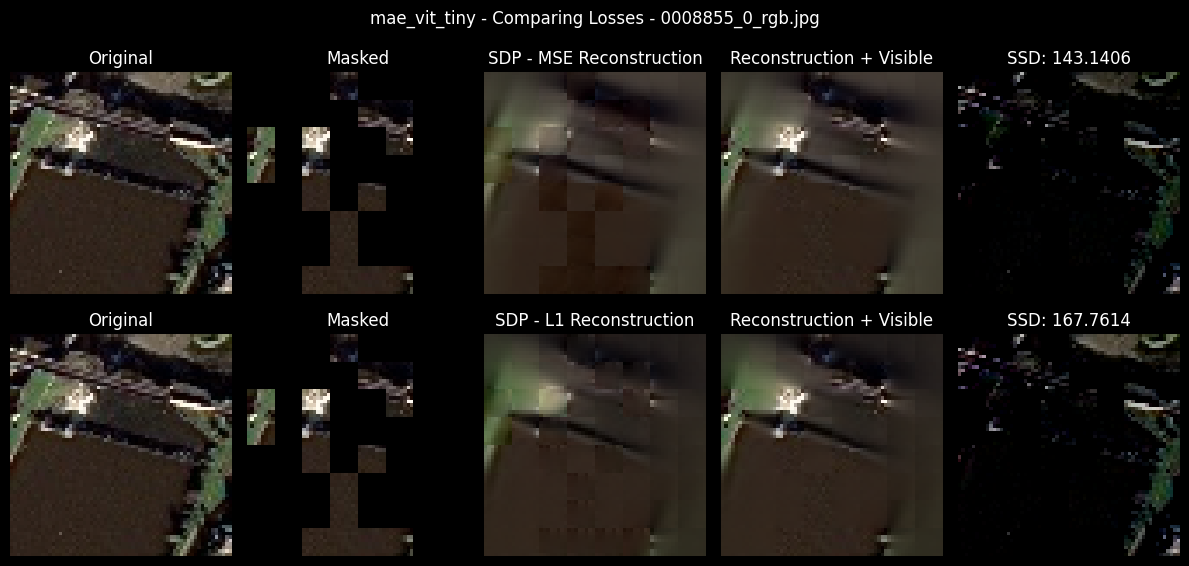

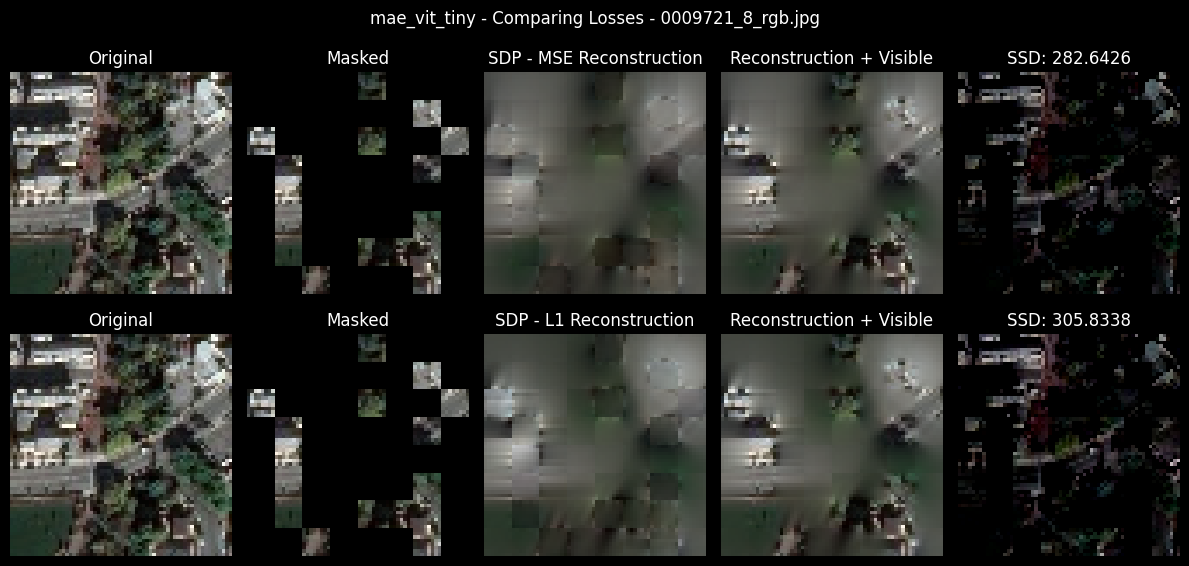

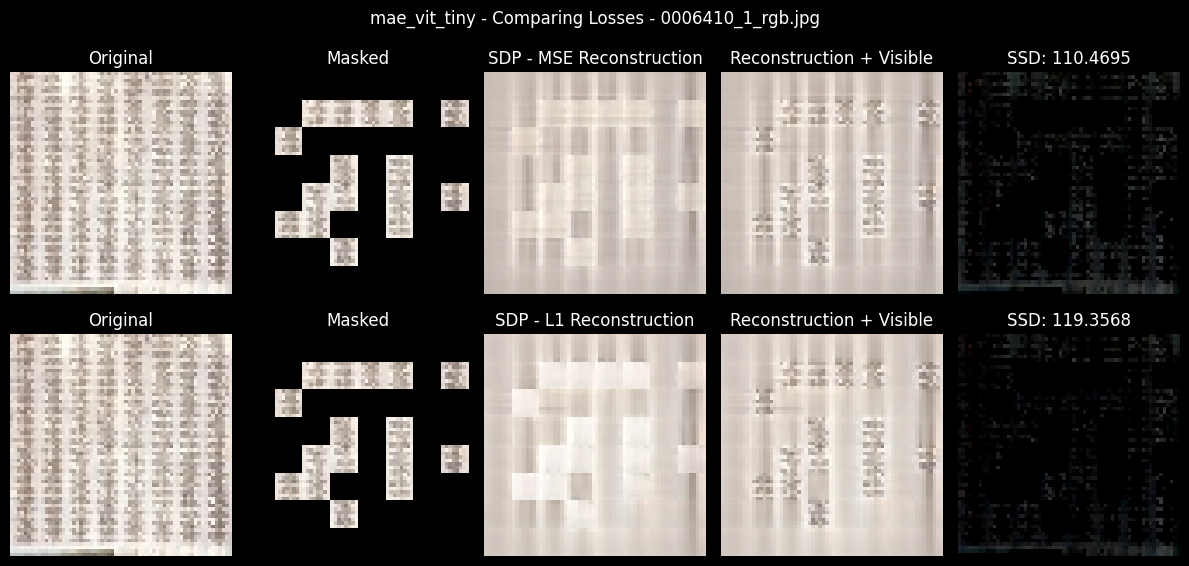

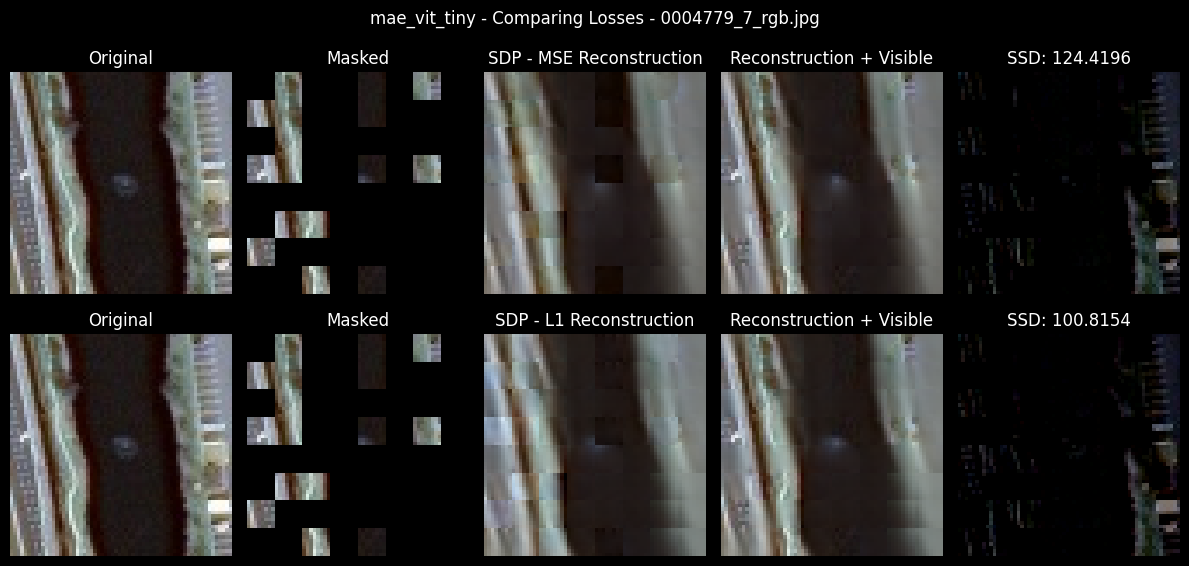

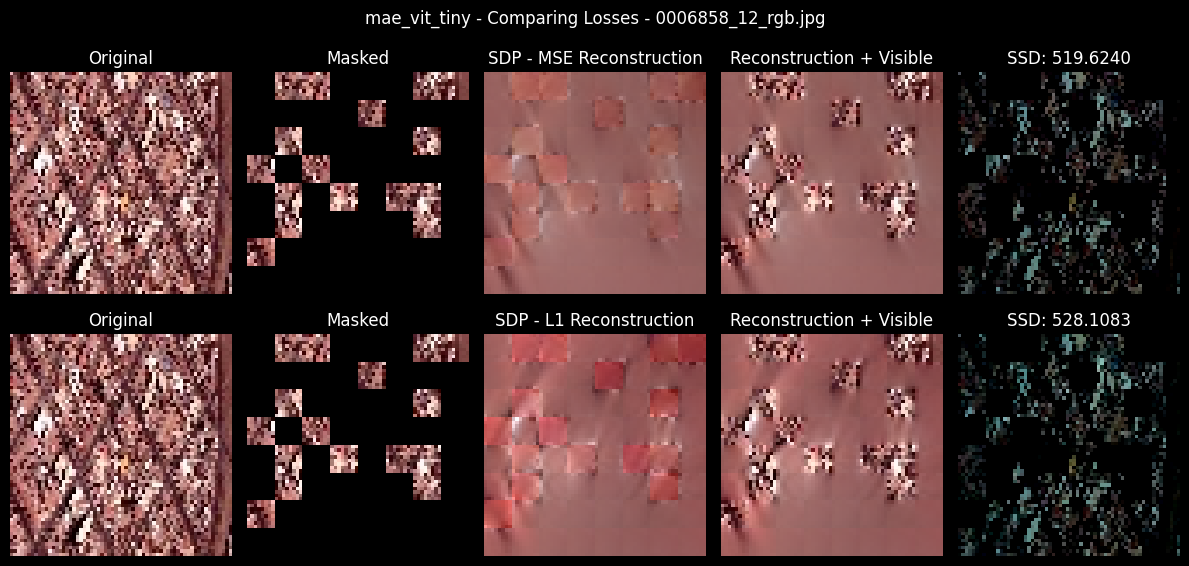

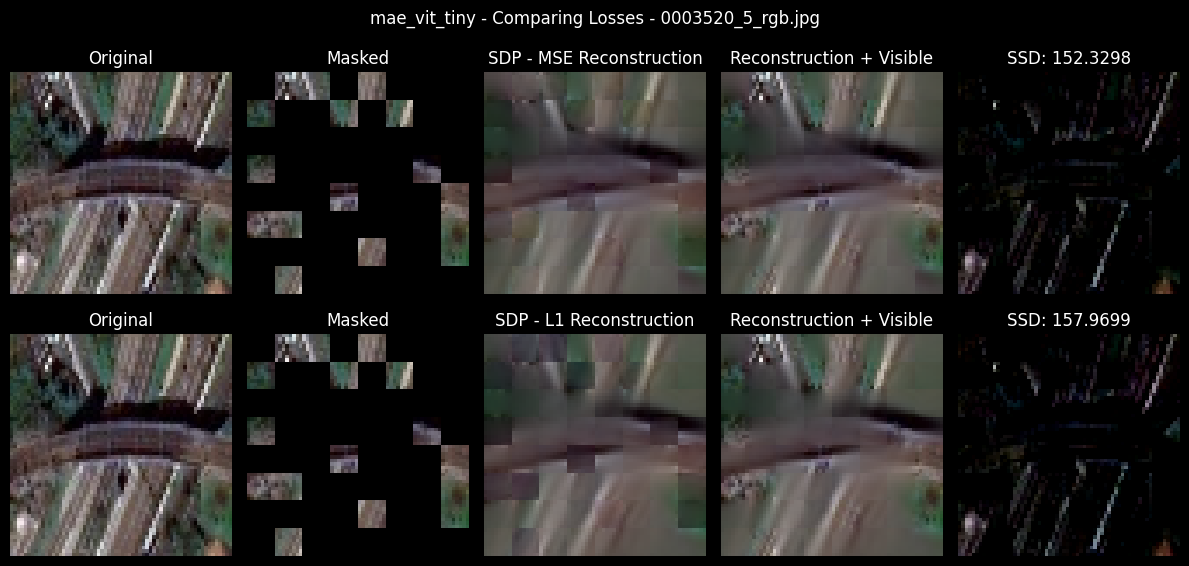

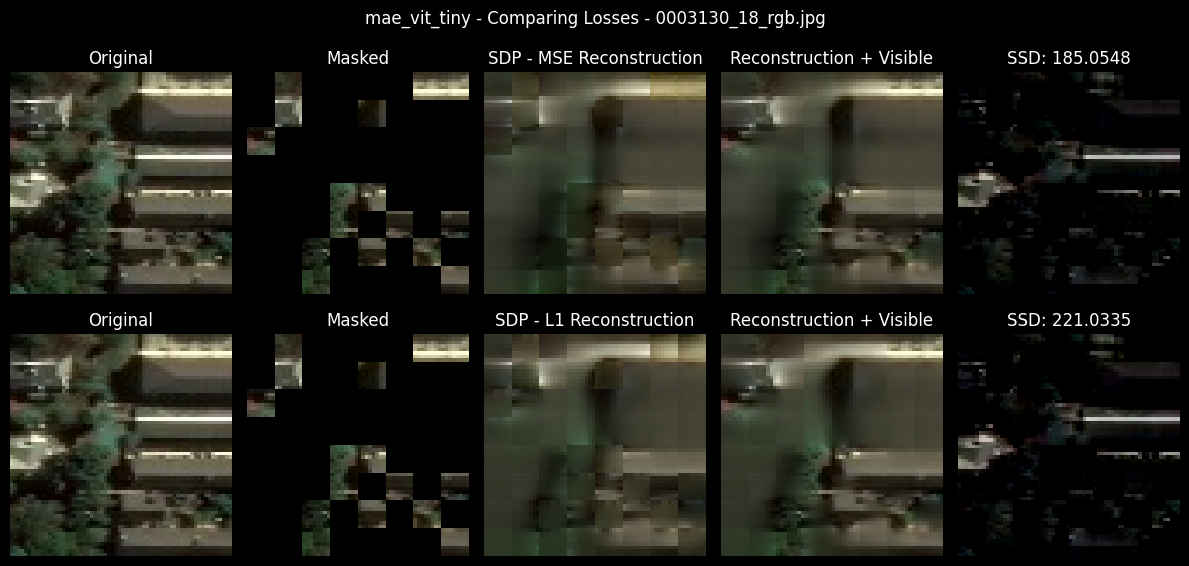

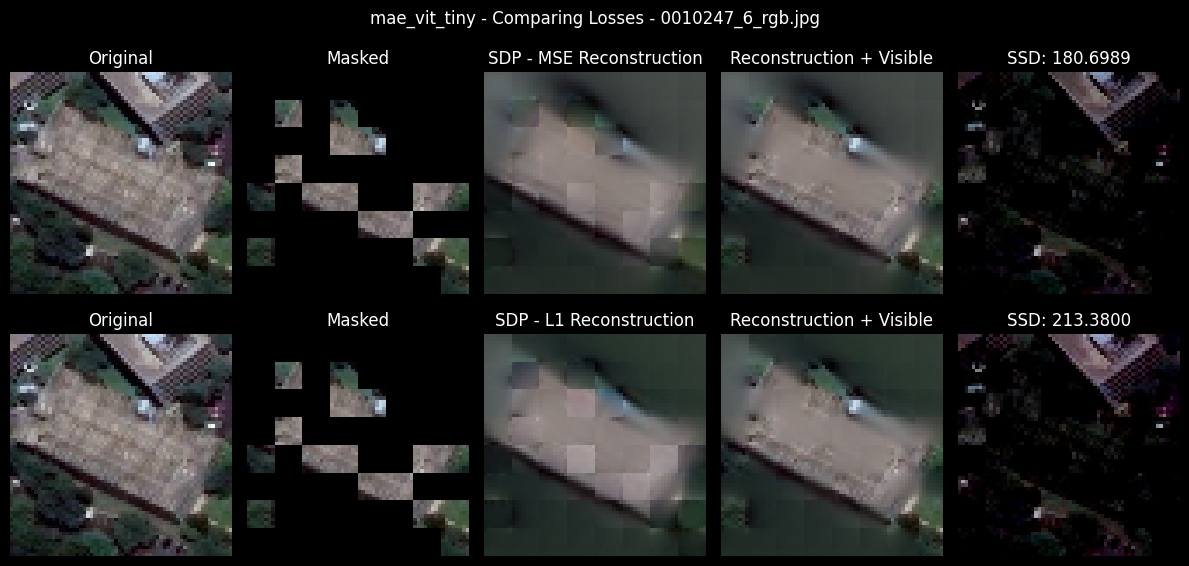

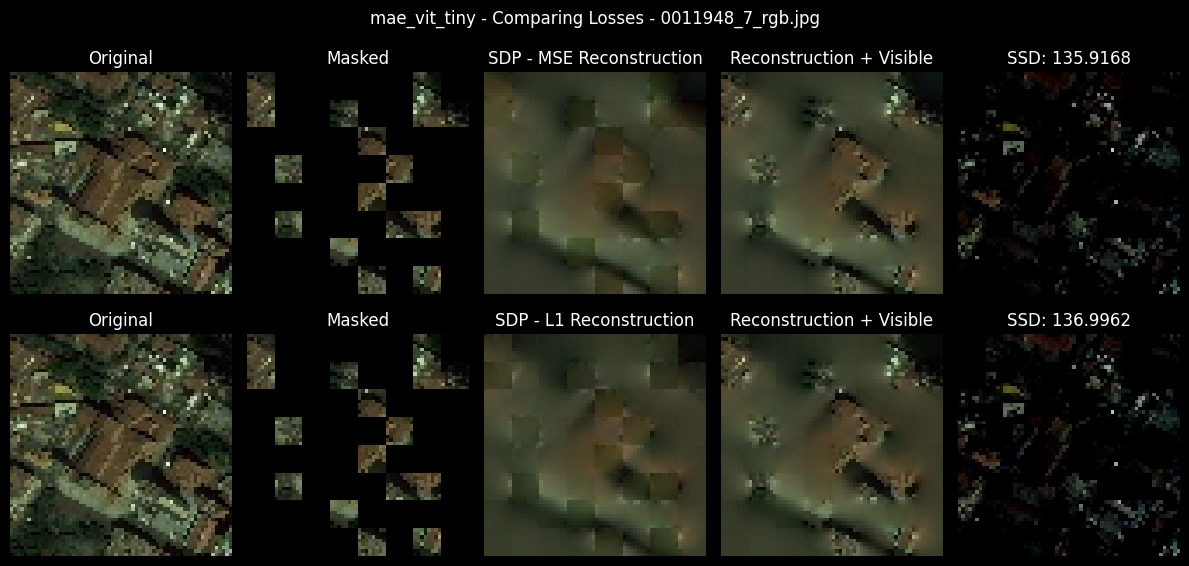

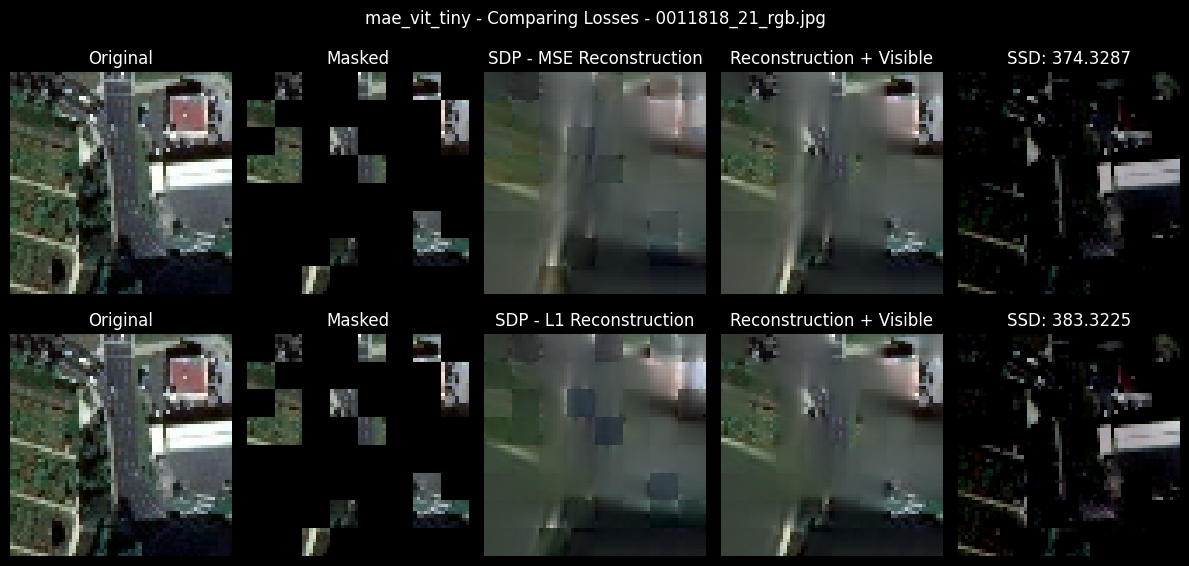

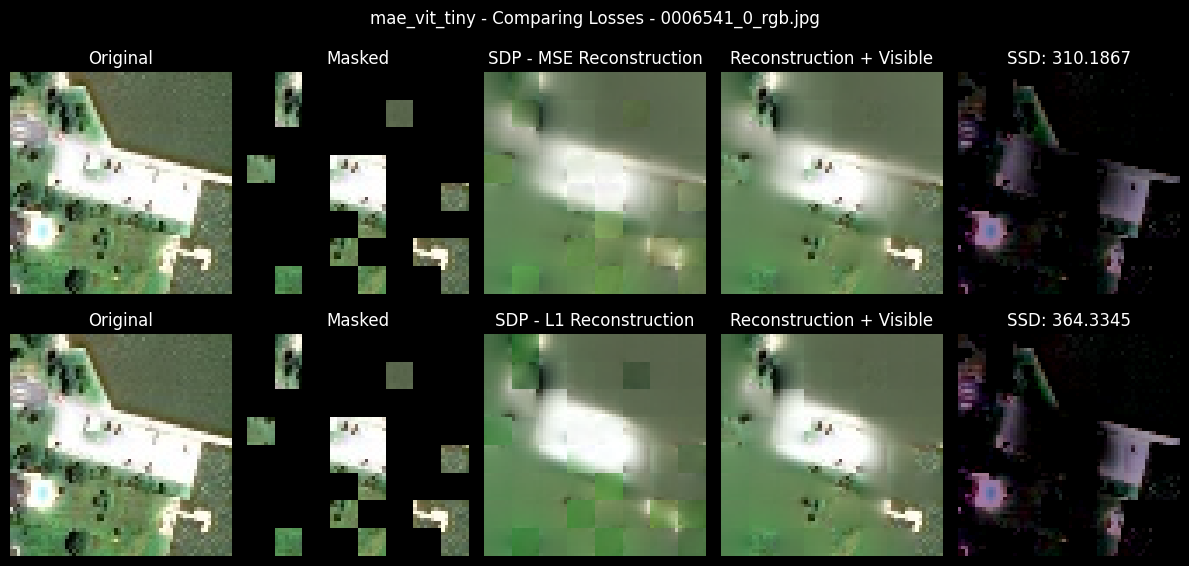

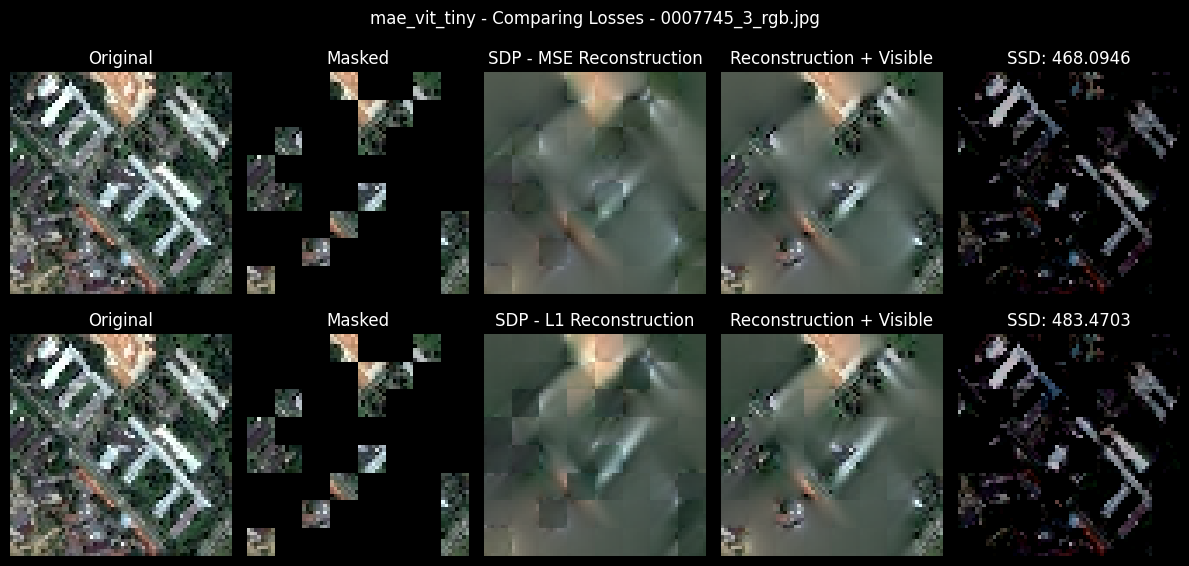

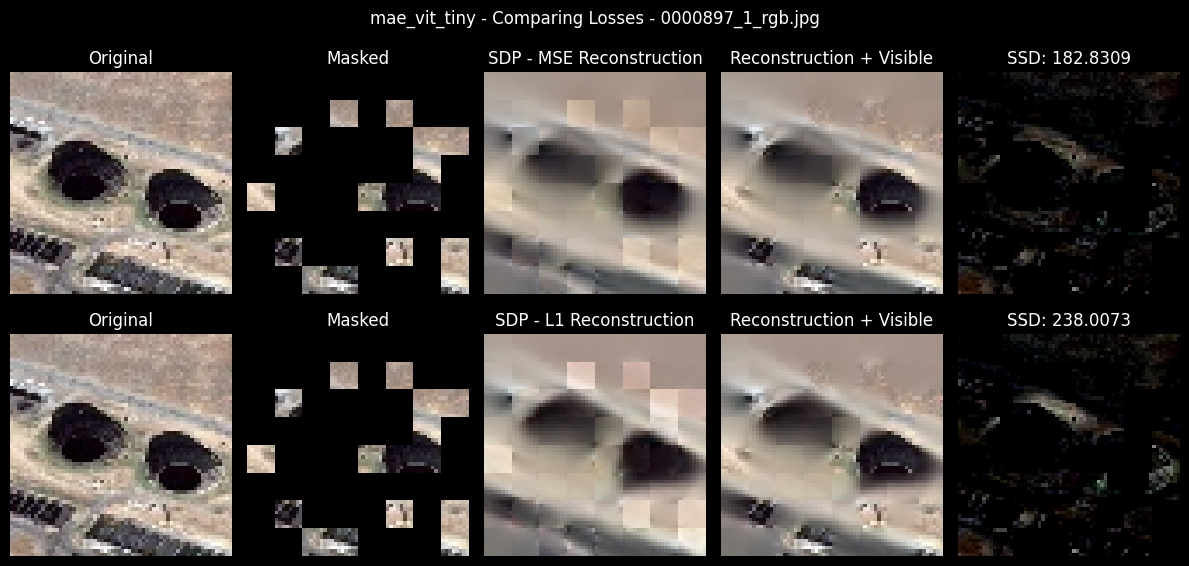

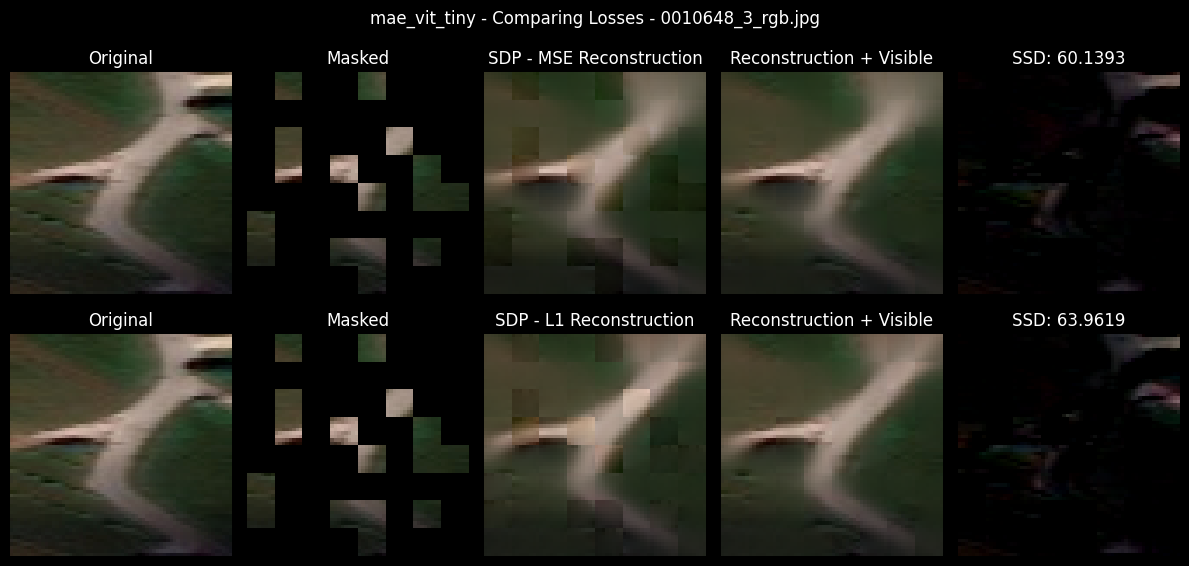

In [ ]:
viz.plot_comp_many(
    models,
    "../fmow-rgb-preproc/data_64/input/test_data/test/",
    max_img_samples=20,
    random_walk=True,
    walkseed=123,
    maskseed=None,
    base_title=f"{common_architecture} - Comparing Losses",
    save=False,
)